# **Calculating Phase**

## Importing necessary imports

In [1]:
#import qiskit tools
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import numpy as np
import time

In [2]:
#from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, assemble
from numpy import pi
from math import atan2, sqrt
from qiskit.quantum_info import Statevector
from ibm_quantum_widgets import CircuitComposer


## Loading account

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')


## Making the real circuit

In [4]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.p(pi/3, qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

## Visualizing the real circuit

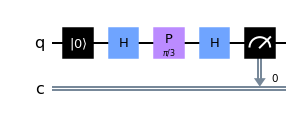

In [5]:
circuit.draw()

## Running the job on ibm_quito

In [6]:
#circuit.save_statevector()
tic = time.time()
transpiled_circuits = transpile(circuit, quito)
job_real = quito.run(transpiled_circuits, shots=8192)
job_monitor(job_real)
result_real = job_real.result()
toc = time.time()

Job Status: job has successfully run


## Fetching the real counts

In [7]:
out_state_real = result_real.get_counts(circuit)

## Now, building the imaginary circuit

In [8]:
circuit_im = QuantumCircuit(qreg_q, creg_c)

circuit_im.reset(qreg_q[0])
circuit_im.h(qreg_q[0])
circuit_im.p(pi/3, qreg_q[0])
circuit_im.sdg(qreg_q[0])
circuit_im.h(qreg_q[0])
circuit_im.measure(qreg_q[0], creg_c[0])

## Visualizing the imaginary circuit

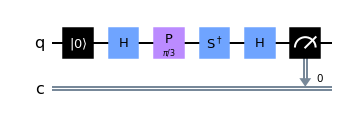

In [9]:
circuit_im.draw()

## Running the job on ibm_quito again

In [10]:
tic = time.time()
transpiled_circuits_im = transpile(circuit_im, quito)
job_im = quito.run(transpiled_circuits_im, shots=8192)
job_monitor(job_im)
result_im = job_im.result()
toc = time.time()

Job Status: job has successfully run


## Fetching the imaginary counts

In [11]:
out_state_im = result_im.get_counts(circuit_im)

In [12]:
print(out_state_real, out_state_im)

{'0': 6236, '1': 1956} {'0': 7571, '1': 621}


## Normalizing the real and imaginary values

In [13]:
x_ = (out_state_real['0']-out_state_real['1'])/8192
y_ = (out_state_im['0']-out_state_im['1'])/8192
x_bar = x_/sqrt(x_**2+y_**2)
y_bar = y_/sqrt(x_**2+y_**2)

## Comparing result to expected value

In [14]:
print(atan2(y_bar,x_bar))
print(pi/3)

1.0188202912233635
1.0471975511965976
